<a href="https://colab.research.google.com/github/temiafeye/Colab-Projects/blob/master/Fraud_Detection_Algorithm(Using_SOMs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy

In [0]:
#Build Hybrid Deep Learning Model 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Importing The Dataset
from google.colab import files
uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications (1).csv


In [0]:
dataset = pd.read_csv(io.BytesIO(uploaded['Credit_Card_Applications.csv']))

In [0]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [20]:
#Importing the SOM
from google.colab import files 
uploaded = files.upload()

Saving minisom.py to minisom.py


In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

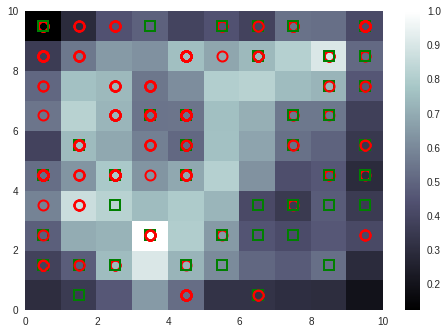

In [24]:
 #Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# Finding the frauds
mappings = som.win_map(X)

In [0]:
frauds = np.concatenate((mappings[(2,4)], mappings[(8,8)]), axis = 0)


In [0]:
frauds = sc.inverse_transform(frauds)


In [0]:
#Part 2 - Create a supervised deep learning model
#Creates a matrix of features
customers = dataset.iloc[:, 1:].values

In [0]:
#Create the dependent variable
is_fraud = np.zeros(len(dataset)) #creates an array of zeroes, scanning through dataset
#initiate a loop, to append values of 1 if fraud data found in dataset 
for i in range(len(dataset)): 
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [43]:
#train artificial neural network 

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [44]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4273 - acc: 1.0000
Epoch 2/2
690/690 [==============================] - 1s 881us/step - loss: 0.0785 - acc: 1.0000


In [0]:
# Part 3 - Making predictions and evaluating the model
# Predicting the probabilities of fraud 
y_pred= classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

In [0]:
#Sorts numpy array in one colum 
y_pred = y_pred[y_pred[:,1].argsort()]

In [53]:
y_pred.shape

(690, 2)